> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

"PatientId": indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.

"AppointmentID": indicates appoint ID, this field should be unique

"Gender": indicates the patient's gender (M/F)

"AppointmentDay": indicates the date/time the patient called to book their appointment.

"Age": indicates the patient's age.

"ScheduledDay" tells us on what day the patient set up their appointment.

"Neighborhood" indicates the location of the hospital.

"Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

"Hipertension": indicates whether or not the patient is experiencing Hypertension.

"Diabetes": indicates whether or not the patient is experiencing Diabetes.

"Alcoholism": indicates whether or not the patient is experiencing Alcoholism.

"Handcap": indicates whether or not the patient is with special needs.

"SMS_received": indicates whether or not the patient has received a reminder text message.

"No-show" ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 


1-What is the overall appointment show vs no show rate?

2- What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
pd.options.display.max_rows = 999999

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There isn't any missing values

In [7]:
df.shape

(110527, 14)

### Rename columns to be easier usage

In [8]:
df.rename(str.lower, axis='columns',inplace=True)
df.rename(columns={"no-show": "no_show"},inplace=True)

In [9]:
df.rename(columns={"patientid":"patient_id","appointmentid":"appointment_id","scheduledday":"scheduled_day","appointmentday":"appointment_day"},inplace=True)

In [10]:
 df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### drop patient_id and	appointment_id

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['patient_id', 'appointment_id'], axis = 1, inplace = True)

### drop duplicated rows

In [12]:
# Check for duplicate rows 
df.duplicated().sum()

635

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
gender             109892 non-null object
scheduled_day      109892 non-null object
appointment_day    109892 non-null object
age                109892 non-null int64
neighbourhood      109892 non-null object
scholarship        109892 non-null int64
hipertension       109892 non-null int64
diabetes           109892 non-null int64
alcoholism         109892 non-null int64
handcap            109892 non-null int64
sms_received       109892 non-null int64
no_show            109892 non-null object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


In [16]:
df.shape

(109892, 12)

In [17]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

### drop invalid value of age

In [18]:
df = df[df.age != -1]
df.shape

(109891, 12)

In [19]:
df.age.value_counts()

0      3530
1      2271
52     1738
49     1645
53     1641
38     1624
56     1623
2      1616
59     1612
50     1601
57     1597
36     1567
51     1561
19     1533
39     1525
54     1523
34     1518
33     1516
37     1516
6      1512
3      1509
30     1505
17     1498
32     1488
5      1482
18     1474
44     1474
58     1459
46     1451
45     1450
21     1441
28     1440
20     1428
7      1420
31     1419
8      1412
55     1406
60     1403
29     1397
40     1393
48     1392
16     1389
47     1388
27     1372
35     1371
63     1368
22     1367
9      1357
23     1344
41     1339
43     1332
61     1332
64     1327
25     1322
62     1307
4      1297
26     1273
42     1268
10     1266
24     1233
15     1205
11     1187
66     1186
14     1110
13     1095
65     1095
12     1089
68     1012
67      972
69      826
73      720
70      718
71      692
72      614
74      601
76      570
78      541
75      540
77      525
80      509
81      430
82      391
79      389
84  

In [20]:
df.age.max()

115

In [21]:
#group of age:
labels = [ '0-24','25-49','50-74','75-99','100-124']
df['age_group'] = pd.cut(df.age, range(0, 126, 25), right=False, labels=labels)
df['age_group'] = df.age_group.astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 13 columns):
gender             109891 non-null object
scheduled_day      109891 non-null object
appointment_day    109891 non-null object
age                109891 non-null int64
neighbourhood      109891 non-null object
scholarship        109891 non-null int64
hipertension       109891 non-null int64
diabetes           109891 non-null int64
alcoholism         109891 non-null int64
handcap            109891 non-null int64
sms_received       109891 non-null int64
no_show            109891 non-null object
age_group          109891 non-null object
dtypes: int64(7), object(6)
memory usage: 11.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,50-74
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-74
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,50-74
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-24
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-74


In [24]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f723a29d3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f723a102278>]], dtype=object)

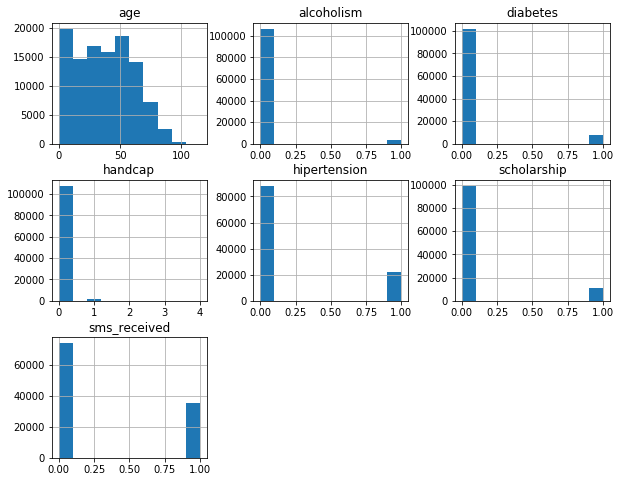

In [25]:
df.hist(figsize=(10,8))

### Research Question 1: what is the overall appointment show vs no show rate?

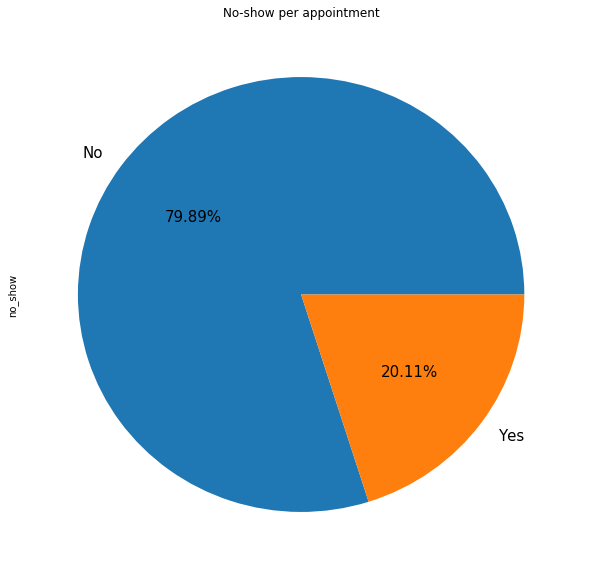

In [26]:
pp=df.no_show.value_counts()
pp.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='No-show per appointment')

 the overall show rate is 79.89%.
 
 the overall no show rate is 20.11%.

In [27]:
attend=df.query('no_show == "No"')
miss=df.query('no_show == "Yes"')

### Research Question 2 What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

### Q2.1 Gender?

In [28]:
df.gender.value_counts()

F    71416
M    38475
Name: gender, dtype: int64

In [29]:
N_of_female=df.query('gender == "F"').gender.count()
N_of_male=df.query('gender == "M"').gender.count()

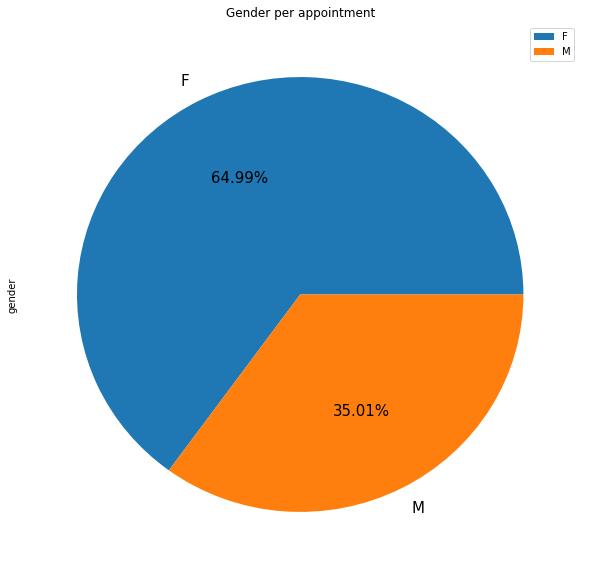

In [30]:
df.gender.value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='Gender per appointment')
plt.legend()

In [31]:
attend.gender.value_counts()

F    56961
M    30832
Name: gender, dtype: int64

In [32]:
female_att=attend.query('gender == "F"').gender.count()
male_att=attend.query('gender == "M"').gender.count()

In [33]:
miss.gender.value_counts()

F    14455
M     7643
Name: gender, dtype: int64

In [34]:
female_miss=miss.query('gender == "F"').gender.count()
male_miss=miss.query('gender == "M"').gender.count()

In [35]:
pct_female_att=female_att/N_of_female
pct_female_miss=female_miss/N_of_female
pct_male_att=male_att/N_of_male
pct_male_miss=male_miss/N_of_male
print('show Female= ',pct_female_att*100,'%')
print('no show Female= ',pct_female_miss*100,'%')
print('show male= ',pct_male_att*100,'%')
print('no show male= ',pct_male_miss*100,'%')

show Female=  79.759437661 %
no show Female=  20.240562339 %
show male=  80.1351526966 %
no show male=  19.8648473034 %


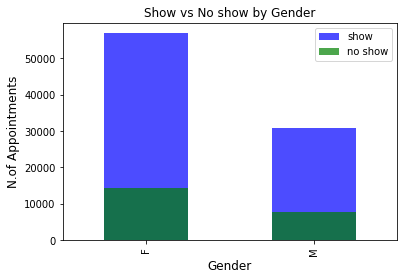

In [36]:
attend.gender.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.gender.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by Gender')
ax.set_xlabel('Gender', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend()

#### summary:

The proportion of appointments where patients who are females is 64.99%

The proportion of appointments where patients who are males is 35.01%

The Show up rate of patients who are male is the highest with 80.14%, where the show up rate of patients who are female is 79.75%

### Q2.2 Age?

There are many values of age so i will make a new columns of group of age

In [37]:
df.age_group.value_counts()

0-24       37065
25-49      35985
50-74      30934
75-99       5898
100-124        9
Name: age_group, dtype: int64

In [38]:
N_from_0_to_24=df.query('age_group == "0-24"').age_group.count()
N_from_25_to_49=df.query('age_group == "25-49"').age_group.count()
N_from_50_to_74=df.query('age_group == "50-74"').age_group.count()
N_from_75_to_99=df.query('age_group == "75-99"').age_group.count()
N_from_100_to_124=df.query('age_group == "100-124"').age_group.count()

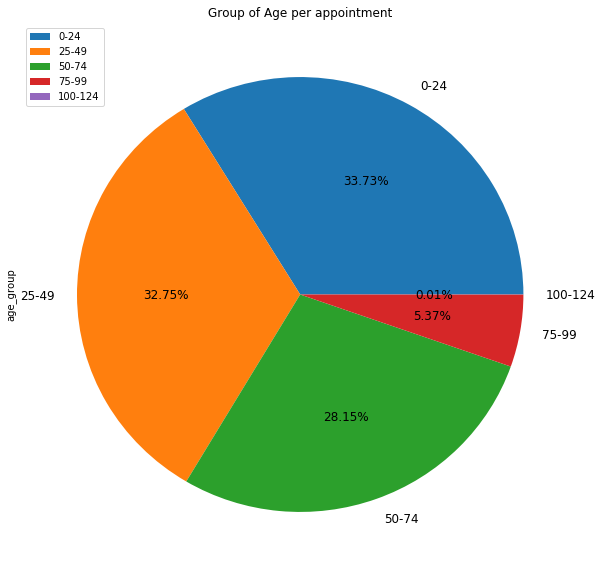

In [39]:
pp=df.age_group.value_counts()
pp.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12,title='Group of Age per appointment')
plt.legend()

In [40]:
g1_att=attend.query('age_group == "0-24"').age_group.count()
g2_att=attend.query('age_group == "25-49"').age_group.count()
g3_att=attend.query('age_group == "50-74"').age_group.count()
g4_att=attend.query('age_group == "75-99"').age_group.count()
g5_att=attend.query('age_group == "100-124"').age_group.count()

In [41]:
g1_miss=miss.query('age_group == "0-24"').age_group.count()
g2_miss=miss.query('age_group == "25-49"').age_group.count()
g3_miss=miss.query('age_group == "50-74"').age_group.count()
g4_miss=miss.query('age_group == "75-99"').age_group.count()
g5_miss=miss.query('age_group == "100-124"').age_group.count()

In [42]:
pct_g1_att=g1_att/N_from_0_to_24
pct_g1_miss=g1_miss/N_from_0_to_24
pct_g2_att=g2_att/N_from_25_to_49
pct_g2_miss=g2_miss/N_from_25_to_49
pct_g3_att=g3_att/N_from_50_to_74
pct_g3_miss=g3_miss/N_from_50_to_74
pct_g4_att=g4_att/N_from_75_to_99
pct_g4_miss=g4_miss/N_from_75_to_99
pct_g5_att=g5_att/N_from_100_to_124
pct_g5_miss=g5_miss/N_from_100_to_124
print('from_0_to_24 show= ',pct_g1_att*100,'%')
print('from_0_to_24 no show= ',pct_g1_miss*100,'%')
print('from_25_to_49 show= ',pct_g2_att*100,'%')
print('from_25_to_49 no show= ',pct_g2_miss*100,'%')
print('from_50_to_74 show= ',pct_g3_att*100,'%')
print('from_50_to_74 no show= ',pct_g3_miss*100,'%')
print('from_75_to_99 show= ',pct_g4_att*100,'%')
print('from_75_to_99 no show= ',pct_g4_miss*100,'%')
print('from_100_to_124 show= ',pct_g5_att*100,'%')
print('from_100_to_124 no show= ',pct_g5_miss*100,'%')

from_0_to_24 show=  77.3398084446 %
from_0_to_24 no show=  22.6601915554 %
from_25_to_49 show=  78.4743643185 %
from_25_to_49 no show=  21.5256356815 %
from_50_to_74 show=  83.7751341566 %
from_50_to_74 no show=  16.2248658434 %
from_75_to_99 show=  84.1980332316 %
from_75_to_99 no show=  15.8019667684 %
from_100_to_124 show=  77.7777777778 %
from_100_to_124 no show=  22.2222222222 %


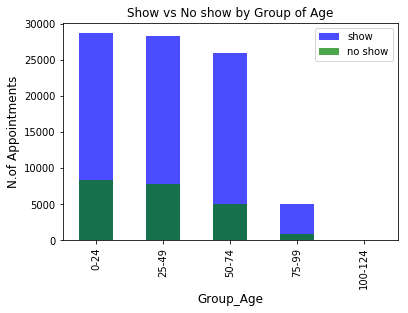

In [43]:
attend.age_group.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.age_group.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by Group of Age')
ax.set_xlabel('Group_Age', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend()

#### summary:

The proportion of appointments where patients who are group1 (from 0 to 24) is 33.73%

The proportion of appointments where patients who are group2 (from 25 to 49) is 32.75%

The proportion of appointments where patients who are group3 (from 50 to 74) is 28.15%

The proportion of appointments where patients who are group4 (from 75 to 99) is 5.37%

The proportion of appointments where patients who are group5 (from 100 to 124) is 0.01%

The Show up rate of patients who are group4 is the highest with 84.19%

### Q2.3 Scholarship?

In [44]:
df.scholarship.value_counts()

0    99090
1    10801
Name: scholarship, dtype: int64

In [45]:
N_scholarship=df.query('scholarship == 1').scholarship.count()
N_no_scholarship=df.query('scholarship == 0').scholarship.count()

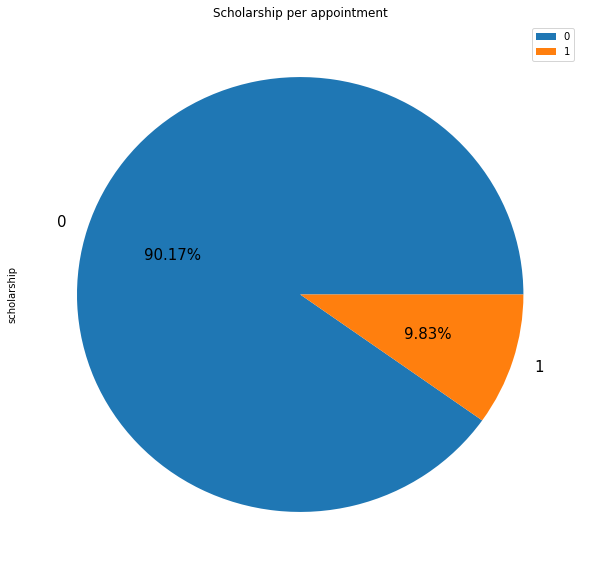

In [46]:
df.scholarship.value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='Scholarship per appointment')
plt.legend()

In [47]:
scholarship_att=attend.query('scholarship == 1').scholarship.count()
no_scholarship_att=attend.query('scholarship == 0').scholarship.count()

In [48]:
scholarship_miss=miss.query('scholarship == 1').scholarship.count()
no_scholarship_miss=miss.query('scholarship == 0').scholarship.count()

In [49]:
pct_scholarship_att=scholarship_att/N_scholarship
pct_scholarship_miss=scholarship_miss/N_scholarship
pct_no_scholarship_att=no_scholarship_att/N_no_scholarship
pct_no_scholarship_miss=no_scholarship_miss/N_no_scholarship
print('scholarship show= ',pct_scholarship_att*100,'%')
print('scholarship no show= ',pct_scholarship_miss*100,'%')
print('No scholarship show= ',pct_no_scholarship_att*100,'%')
print('No scholarship no show= ',pct_no_scholarship_miss*100,'%')

scholarship show=  76.3355244885 %
scholarship no show=  23.6644755115 %
No scholarship show=  80.2785346655 %
No scholarship no show=  19.7214653345 %


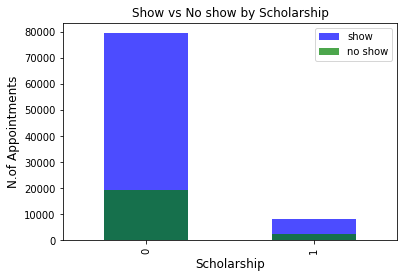

In [50]:
attend.scholarship.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.scholarship.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by Scholarship')
ax.set_xlabel('Scholarship', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend()

#### summary:

The proportion of appointments where patients who have scholarship is 9.83%

The proportion of appointments where patients who don't have scholarship is 90.17%

The Show up rate of patients who are don't have scholarship is the highest with 80.27%, where the show up rate of patients who have scholarship is 76.33%

### Q2.4 SMS_Received?

In [51]:
df.sms_received.value_counts()

0    74409
1    35482
Name: sms_received, dtype: int64

In [52]:
N_received_sms=df.query('sms_received == 1').sms_received.count()
N_no_sms=df.query('sms_received == 0').sms_received.count()

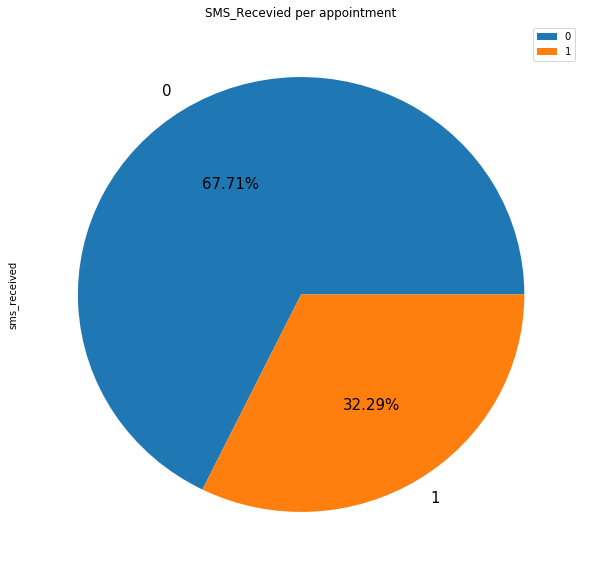

In [53]:
df.sms_received.value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='SMS_Recevied per appointment')
plt.legend()

In [54]:
received_sms_att=attend.query('sms_received == 1').sms_received.count()
no_sms_att=attend.query('sms_received == 0').sms_received.count()

In [55]:
received_sms_miss=miss.query('sms_received == 1').sms_received.count()
no_sms_miss=miss.query('sms_received == 0').sms_received.count()

In [56]:
pct_received_sms_att=received_sms_att/N_received_sms
pct_received_sms_miss=received_sms_miss/N_received_sms
pct_no_sms_att=no_sms_att/N_no_sms
pct_no_sms_miss=no_sms_miss/N_no_sms
print('sms recevied show= ',pct_received_sms_att*100,'%')
print('sms recevied no show= ',pct_received_sms_miss*100,'%')
print('No sms received show= ',pct_no_sms_att*100,'%')
print('No sms received no show= ',pct_no_sms_miss*100,'%')

sms recevied show=  72.4254551604 %
sms recevied no show=  27.5745448396 %
No sms received show=  83.4509266352 %
No sms received no show=  16.5490733648 %


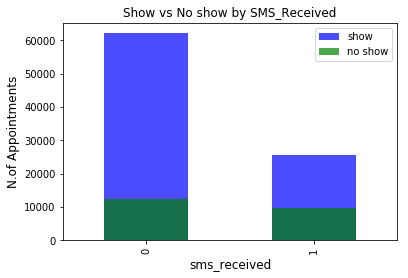

In [57]:
attend.sms_received.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.sms_received.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by SMS_Received')
ax.set_xlabel('sms_received', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend()

#### summary:

The proportion of appointments where patients who receive sms  67.71%

The proportion of patients who don't receive sms is  32.29%

The Show-up rate of patients who don't receive sms is the highest with 83.45%, where the show-up rate of patients who receive sms is 72.42%

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

Limitations & Assumptions:

1-Most of the calculations performed in this project are based on the number of apppointments not patients.

2- As we were not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 data entries from the original dataset. original size 110527; new size: 110526.

questions:

1-What is the overall appointment show vs no show rate?

2- What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

results:

1-the overall show rate is 79.89%.
 
2-the overall no show rate is 20.11%.

3-The proportion of appointments where patients who are females is 64.99%

4-The proportion of appointments where patients who are males is 35.01%

5-The Show up rate of patients who are male is the highest with 80.14%, where the show up rate of patients who are female is 79.75%

6-The proportion of appointments where patients who are (from 0 to 24) is 33.73%

7-The proportion of appointments where patients who are (from 25 to 49) is 32.75%

8-The proportion of appointments where patients who are (from 50 to 74) is 28.15%

9-The proportion of appointments where patients who are (from 75 to 99) is 5.37%

10-The proportion of appointments where patients who are (from 100 to 124) is 0.01%

11-The Show up rate of patients who are (from 75 to 99) is the highest with 84.19%

12-The proportion of appointments where patients who have scholarship is 9.83%

13-The proportion of appointments where patients who don't have scholarship is 90.17%

14-The Show rate of patients who are don't have scholarship is the highest with 80.27%, where the show rate of patients who have scholarship is 76.33%

15-The proportion of appointments where patients who receive sms  67.71%

16-The proportion of patients who don't receive sms is  32.29%

17-The Show-up rate of patients who don't receive sms is the highest with 83.45%, where the show-up rate of patients who receive sms is 72.42%

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0